<a href="https://colab.research.google.com/github/apfurlan/FlaiDDS/blob/main/Md4_cls01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Data**

## Importação dos dados

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

In [2]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dados.shape

(1338, 7)

## EDA Básica

In [5]:
!pip install sweetviz # instalando biblioteca de visualização

     |████████████████████████████████| 15.1MB 306kB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [6]:
import sweetviz #importando biblioteca

In [7]:
eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Algum pré-processamento interessante antes de prosseguir: 

- Transformar a variável smoker em 0 (não) ou 1 (sim)
- Colocar a variável resposta na escala para cada mil dolares

In [8]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 

**Variáveis que vamos considerar na análise, nesse primeiro momento: charges, bmi, smoker.**

In [9]:
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## Gráficos pertinentes

In [10]:
import seaborn as sns

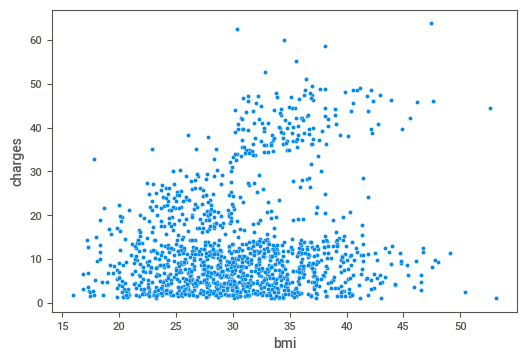

In [11]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados);

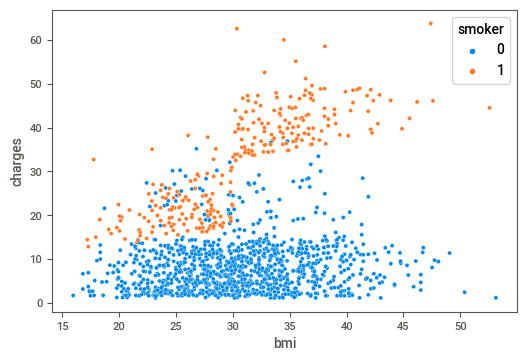

In [12]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## Cenário 1: considerando apenas a variável **bmi**.

In [13]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges'] 


Preparação para a validação do tipo Holdout

In [14]:
# Holdout
# Separando em dados teste e treinamento 

from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)

In [15]:
print(Xtreino.shape)
print(Xteste.shape)

(990, 1)
(348, 1)


In [16]:
# Ajuste do modelo de regressão linear
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
yteste

463     11.165418
1008    23.241475
20      13.228847
988      4.518826
415      7.345727
          ...    
494     17.942106
797      4.719524
1096    44.641197
281     48.549178
586      3.861210
Name: charges, Length: 348, dtype: float64

In [18]:
# Predição utilizando a amostra teste
preditos = reg.predict(Xteste)
preditos

array([11.25940781, 10.88525299, 15.225449  , 14.70163224, 15.08169477,
       12.56894971, 10.66272932, 18.93745874, 17.94102536, 11.82064006,
       13.87849161, 15.21166434, 16.16477454, 12.179041  , 19.84724574,
        9.57571109, 12.95885843, 13.09276647, 13.26212076, 13.61658323,
       13.31725937, 15.65671167, 16.72009907, 13.00218162,  9.87503495,
       13.01793551, 16.46803687, 11.33423878,  9.46346464, 12.90568906,
       11.24562316, 13.54175227, 13.16759744, 12.11996392, 12.3818723 ,
       13.43541353, 11.55873168, 15.64489625, 11.22199233, 11.03491492,
       15.30027996,  9.79626551, 14.00255348, 16.42471368, 13.27984389,
       12.04513295, 12.62408832, 14.00255348, 17.84453279, 14.4751701 ,
       13.52205991, 13.76624516, 10.18617423, 14.08132292, 11.00931485,
       10.43626719, 10.92266847,  9.5382956 , 11.87577866, 13.16759744,
       14.47713934, 13.92378404, 10.01288146, 13.76624516, 10.96008395,
       10.69817557, 11.82064006, 16.3380673 , 12.34445682, 15.48

In [19]:
import numpy as np
np.mean((preditos - yteste)**2)

145.644938909407

In [20]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error 
eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 145.64


In [21]:
# Coeficientes
b0 = reg.intercept_
b1 = reg.coef_
print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)


Intercepto: 
 1.0449809981891907
Coeficientes: 
 [0.39384719]


Nesse cenário, o modelo de regressão linear é dado por

 **CUSTOS = b0 + b1 * IMC**

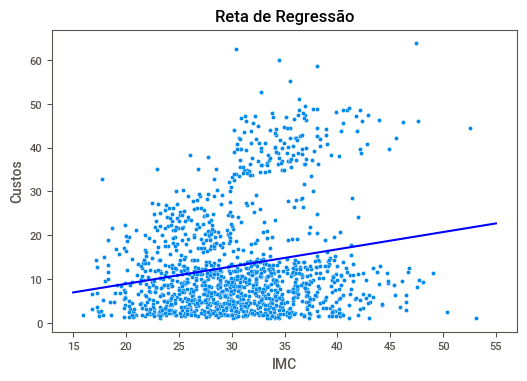

In [22]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

Note agora o que aconteceria se ajustassemos e avaliassemos o modelo no mesmo conjunto de dados (nesse caso, os dados todos).

In [23]:
reg0 = LinearRegression()
reg0.fit(X, y)

preditos = reg0.predict(X)

eqm = mean_squared_error(y, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 140.78


---

## Cenário 2: considerando a variável **bmi** e **smoker**.

In [24]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [25]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM : {}'.format(round(eqm, 2)))

EQM : 53.17


In [26]:
# Coeficientes
b0 = reg.intercept_
b1, b2 = reg.coef_
print('Intercepto: \n',reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -2.586905888185518
Coeficientes: 
 [ 0.35698621 24.27772172]


In [27]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

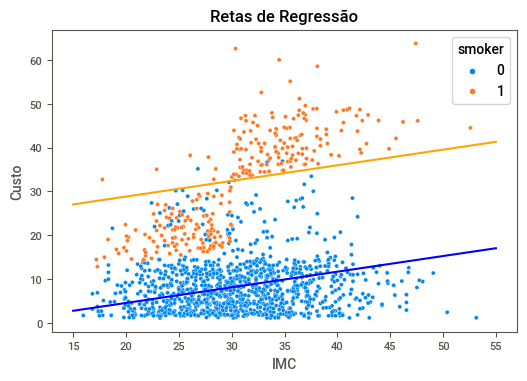

In [28]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

---

## **Exercício**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [29]:

Nexps = 100
arrEQM = np.zeros(Nexps,dtype = np.float)

for i in range(Nexps) : 
  Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)
  reg = LinearRegression()
  reg.fit(Xtreino,ytreino)
  preditos = reg.predict(Xteste)
  arrEQM[i] = mean_squared_error(yteste,preditos)

print(np.mean(arrEQM))

51.189317949040614


### **Passo 2 :** Avaliar como o erro (EQM) varia a medida que 
aumentamos o número de realizações do processo.

In [30]:
Nmeas     = 2     # numero de medidadas 
deltaMeas = 1     # taxa de variação do numeros de medidas
Nexp      = 300  # numero de experimentos - Cada experimentos é caracterizado
                  # por um dado numero de medidas. 

EQM = np.zeros(Nexp,dtype=float)

# loop sobre os diferentes experimentos
for iexp in range(Nexp) :
  #print(iexp)
  arrEQM = np.zeros(Nmeas) 

  for imeas in range(Nmeas) : 
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.26)
    reg = LinearRegression()
    reg.fit(Xtreino,ytreino)
    preditos  = reg.predict(Xteste)
    arrEQM[imeas] = mean_squared_error(yteste,preditos)

  EQM[iexp] = np.mean(arrEQM)
  Nmeas += deltaMeas 
  del arrEQM

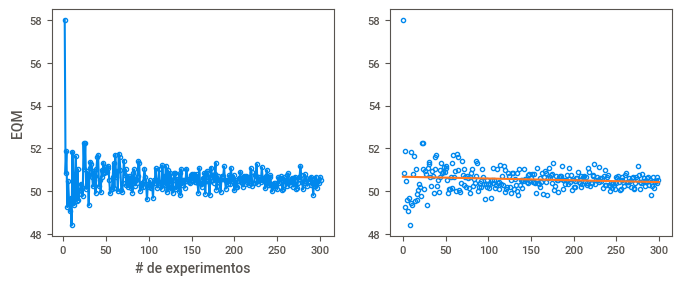

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))


xx = np.arange(0,300,1)
ax1.plot(xx+2,EQM,'o-',mfc='None')
ax1.set_ylabel('EQM')
ax1.set_xlabel('# de experimentos')

#ax1.plot(xx+2,np.sqrt(xx+2))


ax2.plot(xx,EQM,'o',mfc='None')
xx2 = np.arange(0,Nexp,0.1)
popt = np.polyfit(xx,EQM,deg=1)
ax2.plot(xx2,np.polyval(popt,xx2),'-')




### **Passo 3 :** Avaliar o efeito da distribuição entre treino e teste no EQM. Vou utilizar 1000 realizações distintas.

In [38]:

ttRatio = np.arange(.2,.8,0.05)

Nreals = 1000
arrEQM = np.zeros(Nreals,dtype = np.float)
EQM = np.zeros(len(ttRatio),dtype=np.float)

for iratio in range(len(ttRatio)) : 

  for i in range(Nreals) : 
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = ttRatio[iratio])
    reg = LinearRegression()
    reg.fit(Xtreino,ytreino)
    preditos = reg.predict(Xteste)
    arrEQM[i] = mean_squared_error(yteste,preditos)

  EQM[iratio] = np.mean(arrEQM)


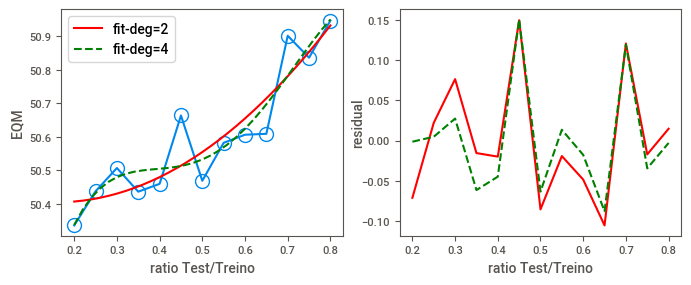

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3))

ax1.plot(ttRatio,EQM,'o-',mfc='None',ms=10)

xx = np.arange(.2,.8,.02)
popt = np.polyfit(ttRatio,EQM,deg=2)
ax1.plot(xx,np.polyval(popt,xx),'r-',label='fit-deg=2')
ax2.plot(ttRatio,EQM - np.polyval(popt,ttRatio),'r-')

popt = np.polyfit(ttRatio,EQM,deg=4)
ax1.plot(xx,np.polyval(popt,xx),'g--',label='fit-deg=4')
ax2.plot(ttRatio,EQM - np.polyval(popt,ttRatio),'g--')

ax1.set_xlabel('ratio Test/Treino')
ax1.set_ylabel('EQM')

ax2.set_ylabel('residual',labelpad=-3)
ax2.set_xlabel('ratio Test/Treino')

ax1.legend(loc='best')
#ax2.plot(ttRatio,EQM - np)